<a href="https://colab.research.google.com/github/hopesofbuzzy/URFU_adii/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B8/Kaggle/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Титаник

Моя задача - классифицировать людей: какие люди выживут (1), а какие погибнут (0) на основе признаков (предикторов).

In [47]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
from matplotlib import pyplot as plt
import pandas as pd
from google.colab import files

# Разведочный анализ данных
Сперва важно оценить, с какими данными мы работаем. Мы не можем просто на основе данных начинать какое-то предсказание или какой-то анализ.

In [49]:
files.upload()


{}

In [50]:
!ls  # Подгрузка файлов
df = pd.read_csv('train.csv', index_col=0)
df.describe()

sample_data  submission.csv  test.csv  train.csv


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Предобработка данных. Кодируем пол (1, 0), объединяем столбцы с родственными связями (1, 0)

In [52]:
df['Sex'] = (df['Sex'] == 'female').astype(int)
df['Relatives'] = (df['SibSp'] + df['Parch']).astype(bool).astype(int)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,1


В полях возраста пропуски. Будем игнорировать записи, где есть пропуски. Пока что это самый надёжный способ. С другой стороны, можно оценить выборку возраста. mean = 29. Посмотрим

In [53]:
# Признаки, в которых мы заинтересованы в нашем исследовании
features = ['Sex', 'Age', 'Pclass', 'Relatives', 'Survived']
dfc = df.dropna(subset=features)

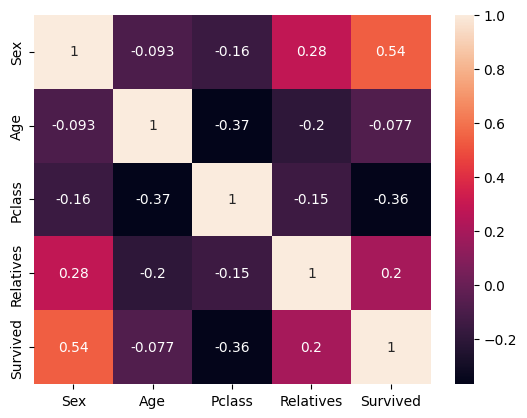

In [54]:
corr_matrix = dfc[features].corr()
plt.show(sns.heatmap(corr_matrix, annot=True))
# corr_matrix = df[features].corr()
# plt.show(sns.heatmap(corr_matrix, annot=True))

Заметим, кстати, что удаление пропусков не сильно изменило корреляцию (даже для возраста).
Уже можно увидеть некоторые потенциальные корреляции, но будем аккуратны

Корректно ли вообще проводить корреляцию с возрастом целиком? Возможно, стоит проводить анализ внутри возрастных групп.

С первого взгляда кажется, будто возраст вообще ни на что не влияет. Почему он включён с настолько ничтожным коэфф?

Заметим потенциальную мультиколлениарность: sex-relatives, age-pclass.
Я решил обратиться к помощи Qwen

```
Нет, корреляции в пределах |r| ≤ 0.4 почти никогда не считаются проблемой — особенно в задаче вроде Titanic.
Такой уровень связи не вызывает серьёзной мультиколлинеарности и не навредит ни логистической регрессии, ни другим моделям.
```

```
| |r| (абсолютное значение) | Интерпретация |
|--------------------------|----------------|
| 0.0 – 0.1 | Нет корреляции |
| 0.1 – 0.3 | Слабая корреляция |
| 0.3 – 0.5 | Умеренная корреляция |
| 0.5 – 0.7 | Заметная/средняя |
| 0.7 – 0.9 | Сильная |
| > 0.9 | Очень сильная (почти дублирование) |
```

Очевидно, такая корреляция может иметь объяснение: в старости богатые люди предпочитают путешествовать или заниматься хобби. Особенно в начале 20 века. А вот среди бедных часто много молодых (старые бедняки реже доживают до преклонного возраста).

In [55]:
scaler = StandardScaler()
dfc['Age'] = scaler.fit_transform(dfc['Age'].values.reshape(-1, 1))

dfc

/tmp/ipython-input-3118554321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['Age'] = scaler.fit_transform(dfc['Age'].values.reshape(-1, 1))


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,-0.530377,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.571831,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",1,-0.254825,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.365167,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",0,0.365167,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",1,0.640719,0,5,382652,29.1250,NaN,Q,1
887,0,2,"Montvila, Rev. Juozas",0,-0.185937,0,0,211536,13.0000,NaN,S,0
888,1,1,"Graham, Miss. Margaret Edith",1,-0.737041,0,0,112053,30.0000,B42,S,0


Что мы вообще сделали? Обезразмерили возраст (он сильно давит на остальные значения)

```
Что значит 0.0 после преобразования?
Если у пассажира возраст = среднему возрасту в выборке → его Age_scaled = 0.0.
Если возраст выше среднего → значение > 0.
Если ниже среднего → значение < 0.
```

# Обучение логистической модели

Почему логистическая модель? Потому что я хочу понять базовые принципы классификации. Мы уже пробовали линейную регрессию для анализа непрерывных значений, теперь время для "базы" другой задачи.

Мы на основе предикторов xi предсказываем класс y (1, 0)

In [56]:
x_features = ['Sex', 'Age', 'Pclass', 'Relatives']
X = dfc[x_features]
Y = dfc['Survived']
X

,Sex,Age,Pclass,Relatives
PassengerId,,,,
1,0,-0.530377,3,1
2,1,0.571831,1,1
3,1,-0.254825,3,0
4,1,0.365167,1,1
5,0,0.365167,3,0
...,...,...,...,...
886,1,0.640719,3,1
887,0,-0.185937,2,0
888,1,-0.737041,1,0


In [57]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
# Делим датасет тренировки для борьбы с переобучением заранее.
model = LogisticRegression(max_iter=1000)  # max_iter на всякий случай
model.fit(X_train, Y_train)

print("Train score:", model.score(X_train, Y_train))
print("Val score:", model.score(X_val, Y_val))

Train score: 0.8161120840630472
Val score: 0.7272727272727273


In [58]:
import numpy as np

coefs = pd.DataFrame({
    'feature': x_features,
    'coef': model.coef_[0],
    'odds_ratio': np.exp(model.coef_[0])  # exp(coef) = во сколько раз меняются шансы
})
print(coefs.sort_values('coef', key=abs, ascending=False))

     feature      coef  odds_ratio
0        Sex  2.566347   13.018177
2     Pclass -1.262373    0.282982
1        Age -0.624900    0.535315
3  Relatives -0.143144    0.866629


Как мы видим, есть проблема со знаками. Pclass тоже оказывает существенное влияние на выживаемость. Чем ниже значение класса (1 - богачи), тем больше шансов на выживание

# Предсказание

Теперь используем обученную модель для предсказания результатов. Загрузим датасет тестов и отформатируем его так, как сделали с тренировочным.

In [59]:
files.upload()

{}

In [60]:
test = pd.read_csv('test.csv')
# Заполним пустоты возраста медианой (нам нужны все поля для финальной проверки)
test['Age'].fillna(test['Age'].median(), inplace=True)
# Форматируем данные
test['Sex'] = (test['Sex'] == 'female').astype(int)
test['Relatives'] = (test['SibSp'] + df['Parch']).astype(bool).astype(int)
# Обезразмерим данные
test['Age'] = scaler.fit_transform(test['Age'].values.reshape(-1, 1))
test

/tmp/ipython-input-1286511952.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,892,3,"Kelly, Mr. James",0,0.386231,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1.371370,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,2.553537,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,-0.204852,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,-0.598908,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,-0.204852,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0.740881,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,0.701476,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,-0.204852,0,0,359309,8.0500,NaN,S,0


In [61]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,892,3,"Kelly, Mr. James",0,0.386231,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1.371370,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,2.553537,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,-0.204852,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,-0.598908,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,-0.204852,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0.740881,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,0.701476,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,-0.204852,0,0,359309,8.0500,NaN,S,0


In [62]:
features = ['Sex', 'Age', 'Pclass', 'Relatives']
X_test = test[features]

test

predictions = model.predict(X_test)

submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)

# Обучение на случайном лесе

Случайный лес более устойчик в мультиколлениарности в отличие от логистической регрессии. RF используется нами для классификации.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [64]:
x_features = ['Sex', 'Age', 'Pclass', 'Relatives']
X_train = dfc[x_features]
y_train = dfc['Survived']

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    # можно добавить: min_samples_split=5, min_samples_leaf=2
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

# Предсказание на случайном лесе

In [65]:
test = pd.read_csv('test.csv')
# Заполним пустоты возраста медианой (нам нужны все поля для финальной проверки)
test['Age'].fillna(test['Age'].median(), inplace=True)
# Форматируем данные
test['Sex'] = (test['Sex'] == 'female').astype(int)
test['Relatives'] = (test['SibSp'] + df['Parch']).astype(bool).astype(int)
# Обезразмерим данные
test['Age'] = scaler.fit_transform(test['Age'].values.reshape(-1, 1))
test

/tmp/ipython-input-1286511952.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
0,892,3,"Kelly, Mr. James",0,0.386231,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1.371370,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,2.553537,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,-0.204852,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,-0.598908,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,-0.204852,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0.740881,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,0.701476,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",0,-0.204852,0,0,359309,8.0500,NaN,S,0


In [66]:
features = ['Sex', 'Age', 'Pclass', 'Relatives']
X_test = test[features]

In [67]:
predictions = model.predict(X_test)

submission['Survived'] = predictions
submission.to_csv('submission_rf.csv', index=False)

print("Сохранено!")

Сохранено!


❌ Ограничения случайного леса (консультация Qwen):

* «Чёрный ящик»:

* Ты не можешь сказать: «Passenger выжил, потому что его Age = 25» — только «Age — важный признак».

* Может переобучаться, если не ограничить глубину деревьев.

* Плохо экстраполирует (но в классификации это редко проблема).

* Медленнее и требует больше памяти.

* Feature importance может вводить в заблуждение при наличии коррелирующих признаков.